## This Notebook covers basics for Multivariate Regression using Boston House Price dataset.
- EDA
- Viz
- Analysing Coefficients (p-value, VIF, BIC)
- Analysing Residuals


##  Importing packages

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather Data

In [2]:
boston_data = load_boston()

In [3]:
type(boston_data)

sklearn.utils.Bunch

In [4]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# to embed link in jupyter nb use : [] () --> link sholud be placed inside () and [] is used to display the text over that link

[For info google it](http://www.google.com/)

In [5]:
# dir(object name) : used to get lisk of attributes associated with the python object

In [6]:
dir(boston_data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
type(boston_data.DESCR)

str

In [9]:
print(boston_data.data)

print(type(boston_data.data))

print(boston_data.data.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
<class 'numpy.ndarray'>
(506, 13)


In [10]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
boston_data.target # values in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas

In [12]:
# Creating dataframe
data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

In [13]:
# Adding target values to dataframe
data["PRICE"] = boston_data.target

In [14]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
data.count() #Number of rows for each columns

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data : check for missing values

In [16]:
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing data - Histogram, Distribution and barcharts

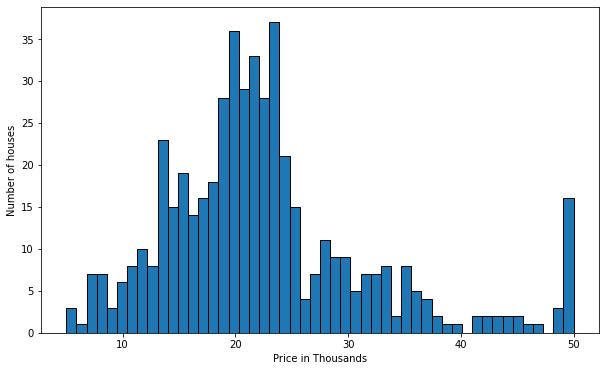

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec = 'black')
plt.xlabel("Price in Thousands")
plt.ylabel("Number of houses")
plt.show()

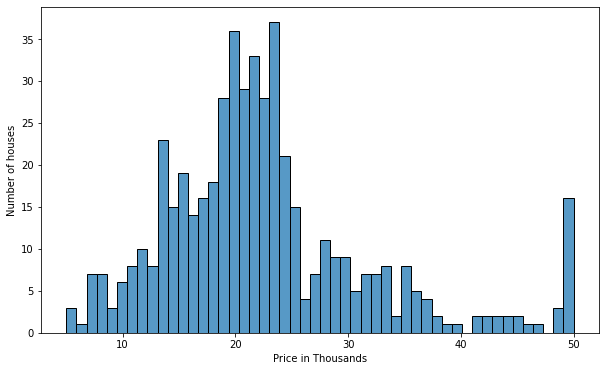

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data['PRICE'],bins=50)
plt.xlabel("Price in Thousands")
plt.ylabel("Number of houses")
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


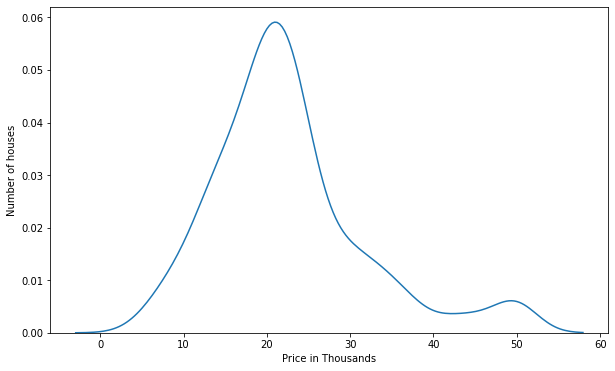

In [21]:
#distplot contains two things histogarm  and probability density fn (KDE)

plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,hist=False)
plt.xlabel("Price in Thousands")
plt.ylabel("Number of houses")
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


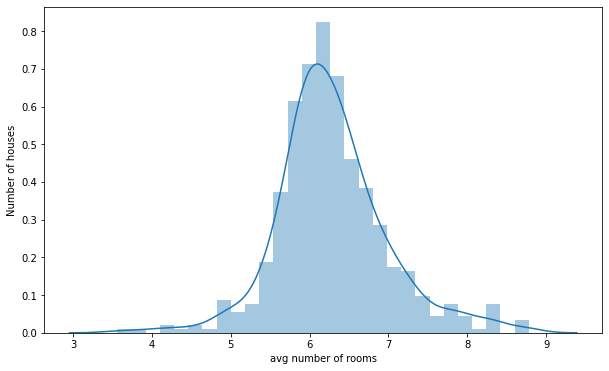

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'])
plt.xlabel("avg number of rooms")
plt.ylabel("Number of houses")
plt.show()

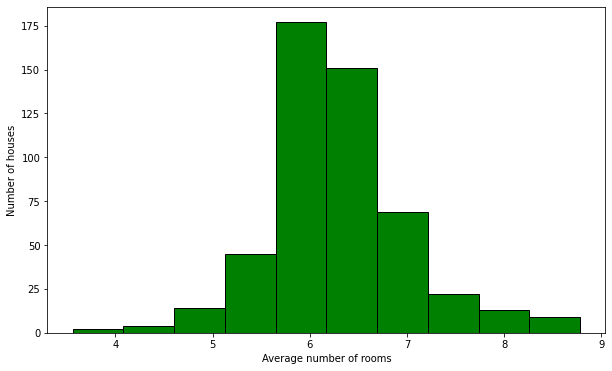

In [23]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec = 'black',color='green')
plt.xlabel("Average number of rooms")
plt.ylabel("Number of houses")
plt.show()

In [24]:
data['RM'].mean()

6.284634387351779

In [25]:
data["RAD"]

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 506, dtype: float64

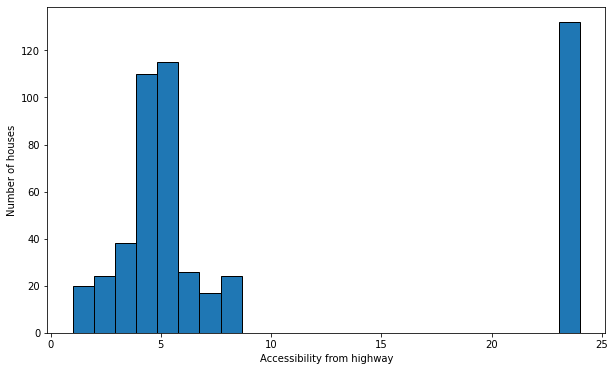

In [26]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24,ec = 'black')
plt.xlabel("Accessibility from highway")
plt.ylabel("Number of houses")
plt.show()

In [27]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

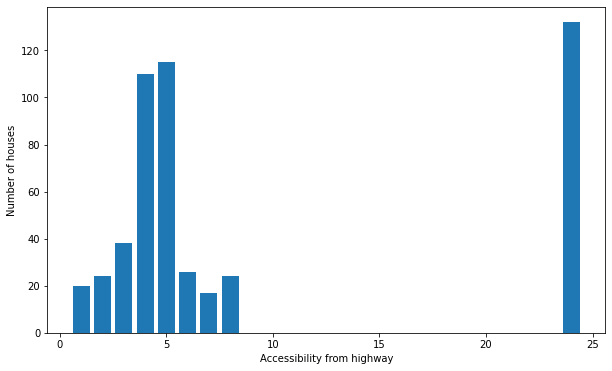

In [28]:
frequency = data['RAD'].value_counts()
frequency.index

plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency)
plt.xlabel("Accessibility from highway")
plt.ylabel("Number of houses")
plt.show()

In [29]:
# How many properties are near charles river

num_houses_near_river = data[data['CHAS']==1].shape[0]
num_houses_near_river

35

In [30]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive statistics ,scatter and outliers

In [31]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation 
## $ \rho_{xy} = corr(x,y) $    -->  $ -1.0 \leq \rho_{xy} \leq +1.0 $

In [32]:
# Why correlation is imp : 1)Strength and 2)Direction

In [33]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [34]:
data.corr()  #Pearson corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
## Having high corr could lead to multicolinearity i.e We could not get exact how much each feature contributes

In [36]:
mask = np.zeros_like(data.corr())
triangel_indices = np.triu_indices_from(mask)
mask[triangel_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<function matplotlib.pyplot.show(close=None, block=None)>

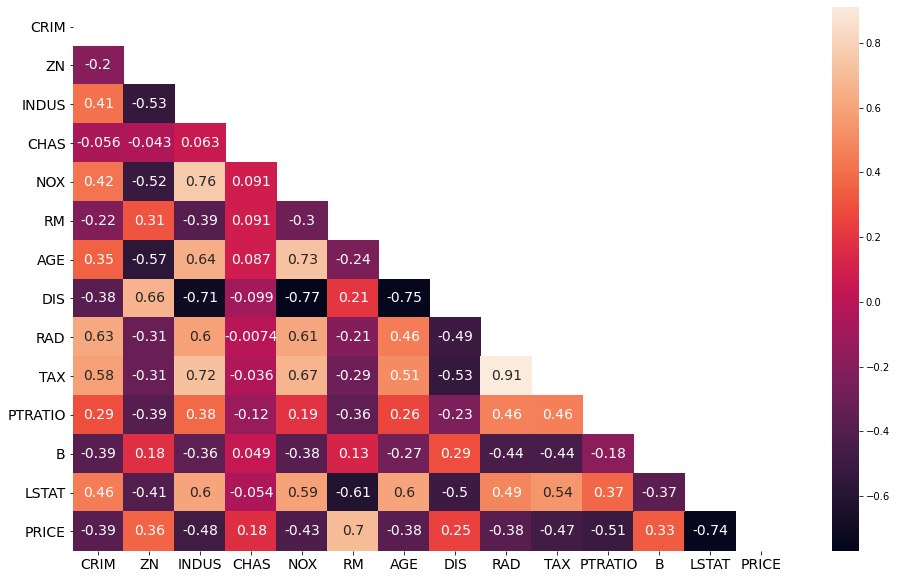

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask, annot=True, annot_kws={"size":14})
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show


#### Drawbacks of Corr
#### 1) Only works with continous data
#### 2) Corr doesnt implies caisation
#### 3) Works for linear relations
#### 4) Outliers can disturb corr
#### Best way is to find corr along with visuals 


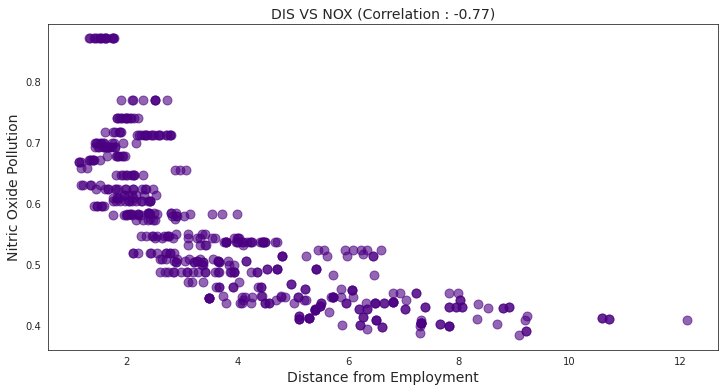

In [38]:
nox_dis = round(data['NOX'].corr(data['DIS']),2)

plt.figure(figsize=(12,6))
plt.scatter(data['DIS'],data['NOX'] , alpha=0.6,s=80, color='indigo')
plt.xlabel('Distance from Employment',fontsize=14)
plt.ylabel('Nitric Oxide Pollution',fontsize=14)
plt.title(f"DIS VS NOX (Correlation : {nox_dis})", fontsize=14)
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

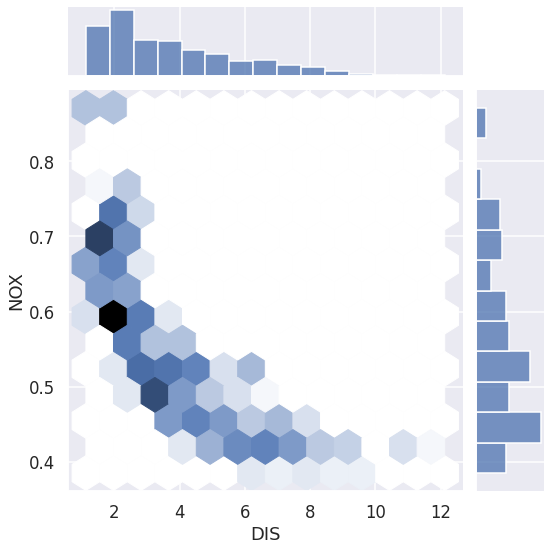

In [39]:
#In seaborn scatter plot is jointplot

sns.set()  #reset styling
sns.set_context('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.jointplot(x=data['DIS'], y=data['NOX'], kind='hex', size=8)
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

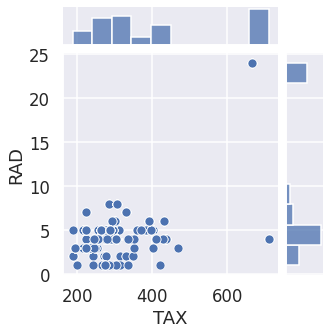

In [40]:
sns.set()  #reset styling
sns.set_context('talk')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.jointplot(x=data['TAX'], y=data['RAD'], size=5)
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


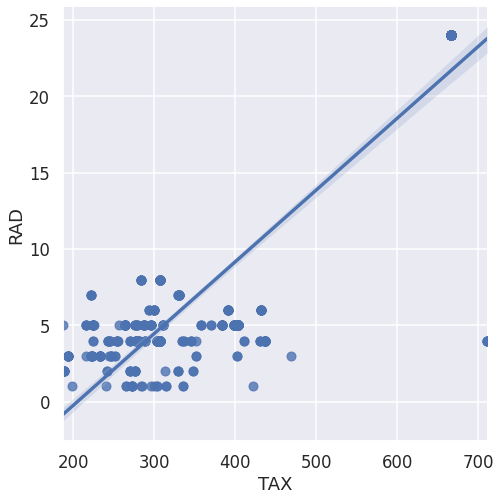

In [41]:
# See linear relation for above graph

sns.lmplot(x='TAX', y='RAD', data=data, size=7)
plt.show()

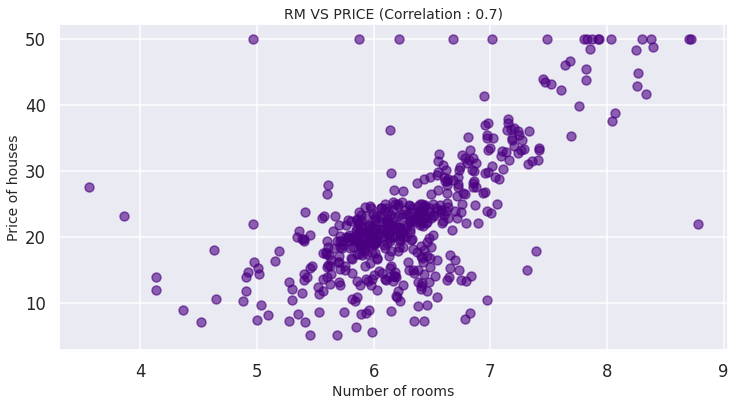

In [42]:
# Price vs RM

rm_price = round(data['RM'].corr(data['PRICE']),2)

plt.figure(figsize=(12,6))
plt.scatter(data['RM'],data['PRICE'] , alpha=0.6,s=80, color='indigo')
plt.xlabel('Number of rooms',fontsize=14)
plt.ylabel('Price of houses',fontsize=14)
plt.title(f"RM VS PRICE (Correlation : {rm_price})", fontsize=14)
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


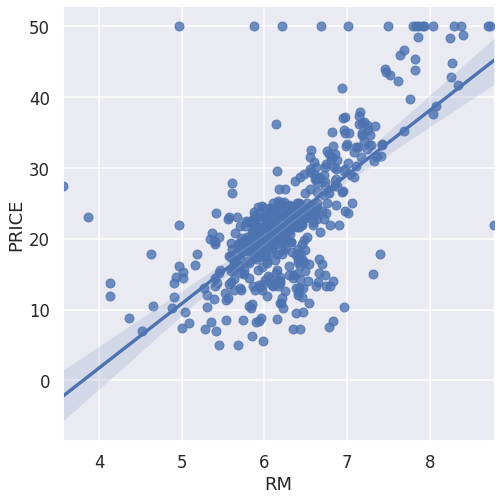

In [43]:
sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

In [44]:
# Diagonal show the histogram and every thing else shows scatter plot

In [45]:
'''%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()'''

"%%time\n\nsns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})\nplt.show()"

## Train and Test data

In [46]:
price = data['PRICE']
features = data.drop('PRICE',axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

In [48]:
# % of training set
len(X_train)/len(features)

0.7984189723320159

In [49]:
# % of test set
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [50]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [51]:
print("Intercepts : ",regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

Intercepts :  36.533051382824596


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [52]:
# R-Square : score

print("Training data r-squared : ",regr.score(X_train,y_train))
print("Test data r-squared : ",regr.score(X_test,y_test))

Training data r-squared :  0.750121534530608
Test data r-squared :  0.6709339839115651


## Data Transformation

In [53]:
# Skew of normal distribution is 0

In [54]:
data['PRICE'].skew()

1.1080984082549072

In [55]:
# Using log to transform gives less difference between data points

y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [56]:
y_log.skew()

-0.33032129530987864

/home/cn7/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


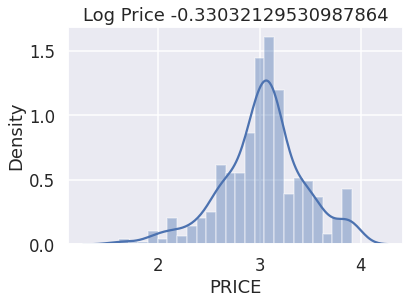

In [57]:
sns.distplot(y_log)
plt.title(f'Log Price {y_log.skew()}')
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


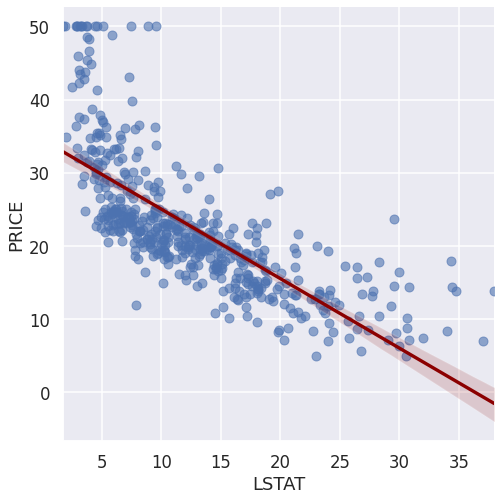

In [58]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, size=7, scatter_kws = {'alpha':0.6}, line_kws = {'color':'darkred'})
plt.show()

/home/cn7/.local/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


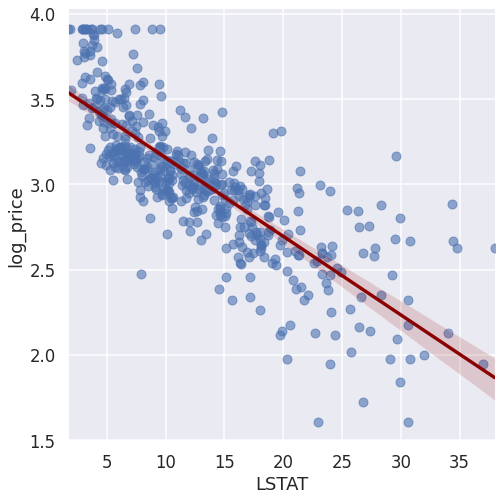

In [59]:
transformed_data = features
transformed_data['log_price'] = y_log
 
sns.lmplot(x='LSTAT', y='log_price', data=transformed_data, size=7, scatter_kws = {'alpha':0.6}, line_kws = {'color':'darkred'})
plt.show()

## Rerun regression using log values

In [60]:
price = np.log(data['PRICE'])
features = data.drop('PRICE',axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

## Multivariable Regression

In [62]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [63]:
print("Intercepts : ",regr.intercept_)
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

Intercepts :  4.059943871775192


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [64]:
# R-Square : score

print("Training data r-squared : ",regr.score(X_train,y_train))
print("Test data r-squared : ",regr.score(X_test,y_test))

Training data r-squared :  0.7930234826697583
Test data r-squared :  0.7446922306260735


In [65]:
# Charles river property premium (reverse the log coef of charles value above)

np.e**0.080331  #1084 $ more 

1.0836456950439142

## P-value and evaluating coefficient (p <0.05 -->significant , p>0.05 --> not significant)

In [66]:
# Add intercept to X_train and apply OLS(ordinary least square) to get regression model

# ** similar to add Xo in ML practice (0o + 01X1....) here Xo 
X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

pd.DataFrame({'Coef':results.params,'p-values':round(results.pvalues,3)})

,Coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [67]:
# INDUS AND AGE features are not significant as it has p values > 0.05

In [68]:
# Multicollinearity : why it is not good?
'''1) Loss Reliability
   2) High Variability in theta estimate
   3) Strange Findings'''


'1) Loss Reliability\n   2) High Variability in theta estimate\n   3) Strange Findings'

## Variance Inflation Factor (VIF) to check for multicollinearity
#### For example suppose we interpret TAX feature for all other features
### $ TAX = \alpha _0 + \alpha _1 RM +  + \alpha _2 NOX +... + \alpha _{12} LSTAT       $

### $ VIF_{TAX} = \frac {1}{( 1-R _{TAX} ^2 )}       $

### Any feature with vif value > 10 is problematic and has multicollinearity

In [69]:
# variance_inflation_factor takes two arg exog : ndarray and exog_idx : index of which column we want to see vif 
variance_inflation_factor(exog  = X_incl_constant.values, exog_idx = 1) # for CRIM column

1.7145250443932485

In [70]:
# to get vif for all columns loop through it
vif_values = [variance_inflation_factor(exog  = X_incl_constant.values, exog_idx = i) 
              for i in range(X_incl_constant.shape[1])]

pd.DataFrame({"Coef ":X_incl_constant.columns,"vif_values":np.round(vif_values,2)})

,Coef,vif_values
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification and BIC 
### (Baysian Information Criterion : Compares multiple models and gives BIC value, Less value is better)

In [71]:
# Original model with log_price and all features

X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

org_coef = pd.DataFrame({'Coef':results.params,'p-values':round(results.pvalues,3)})

print("Original model with log_price and all features")
print("\nBIC is : ",results.bic)
print("R-Squared is : ",results.rsquared)

Original model with log_price and all features

BIC is :  -139.74997769478898
R-Squared is :  0.7930234826697583


In [72]:
# Reduced model #1 Removed INDUS

X_incl_constant = sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS'],axis=1)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

coef_minus_indus = pd.DataFrame({'Coef':results.params,'p-values':round(results.pvalues,3)})

print("Reduced model #1 Removed INDUS")
print("\nBIC is : ",results.bic)
print("R-Squared is : ",results.rsquared)

Reduced model #1 Removed INDUS

BIC is :  -145.14508855591163
R-Squared is :  0.7927126289415162


In [73]:
# Reduced model #2 Removed INDUS,AGE

X_incl_constant = sm.add_constant(X_train)
X_incl_constant = X_incl_constant.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

reduced_coef = pd.DataFrame({'Coef':results.params,'p-values':round(results.pvalues,3)})

print("Reduced model #2 Removed INDUS,AGE")
print("\nBIC is : ",results.bic)
print("R-Squared is : ",results.rsquared)

Reduced model #2 Removed INDUS,AGE

BIC is :  -149.49934294224678
R-Squared is :  0.7918657661852815


In [74]:
# Checking above three models side by side
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames,axis=1)

,Coef,p-values,Coef,p-values,Coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


### Why we should look for patterns between residuals and predicted values
### For a good model there should be no pattern between residuals and predicted values
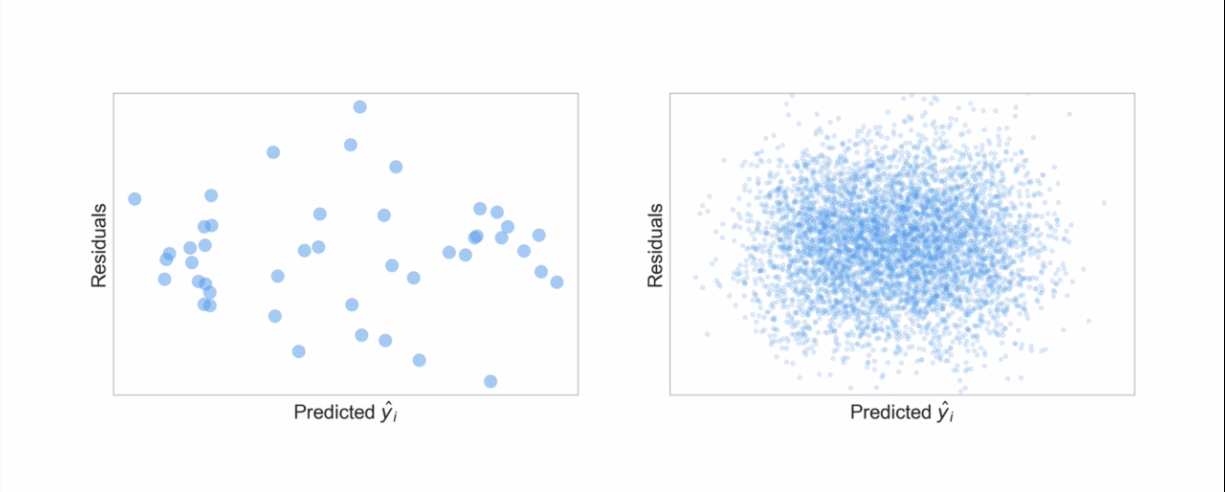

### If there is any patters for eg img below, then there might be something going worng in the model
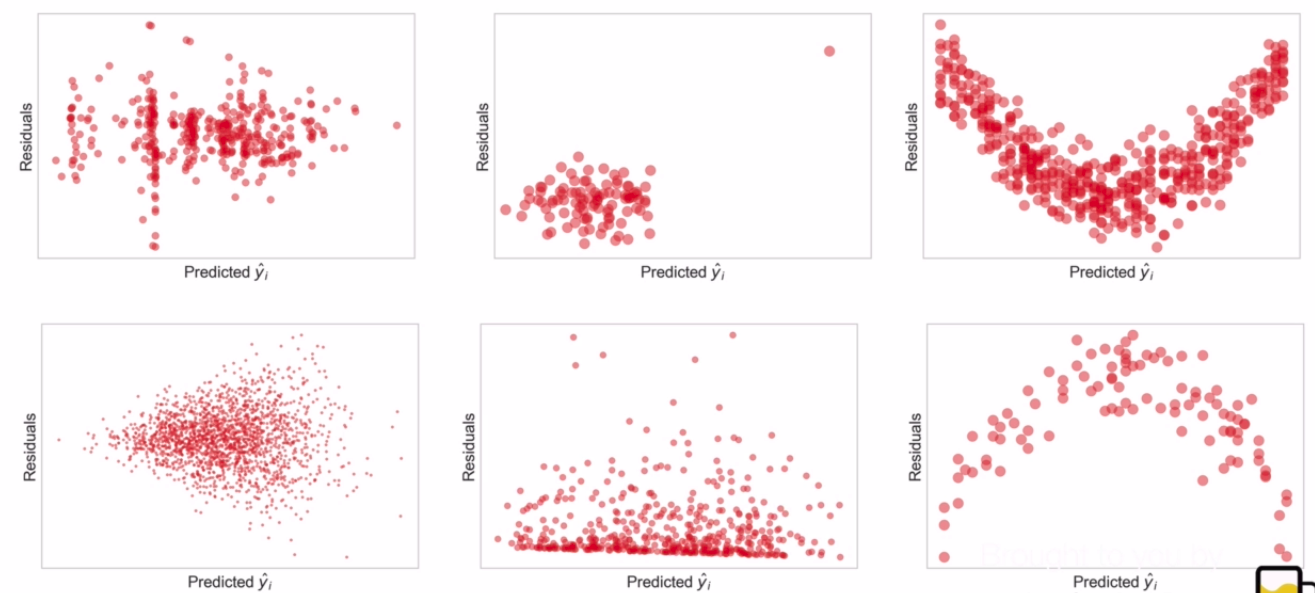

## Residuals and Residuals plot

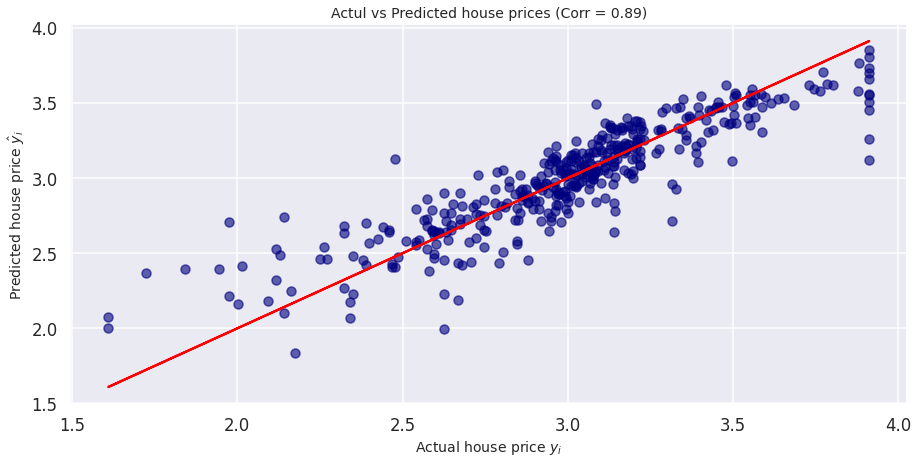

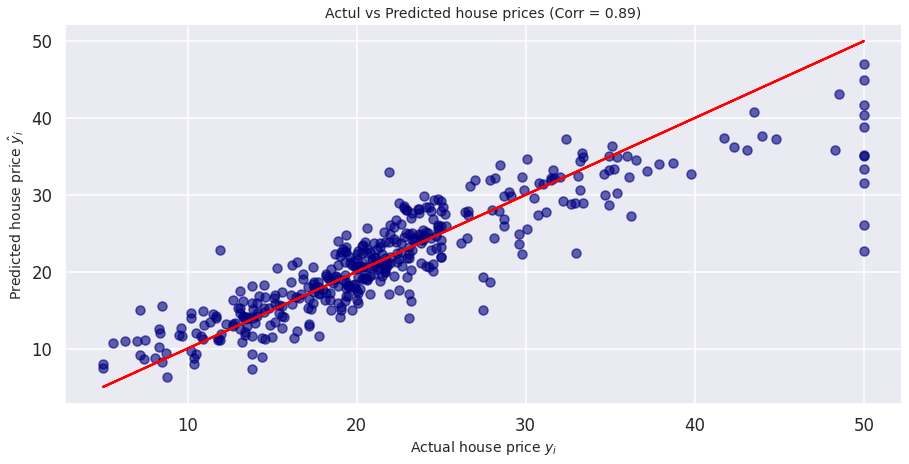

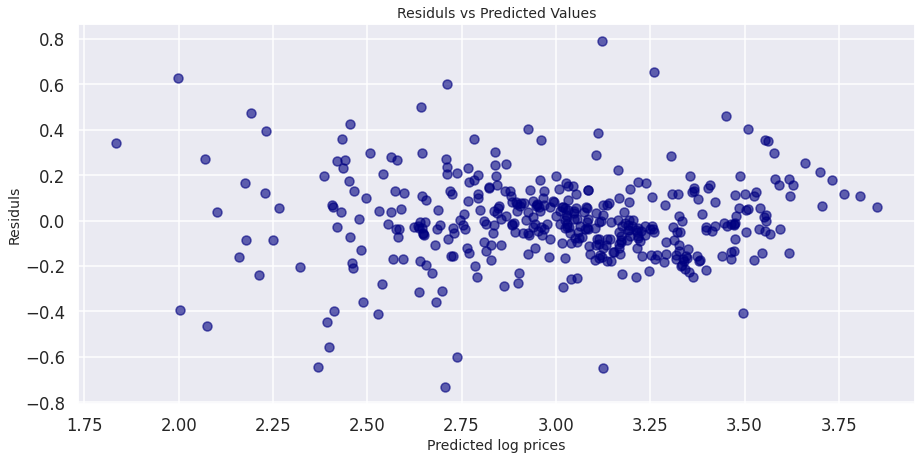

Residuals mean : -0.0  
Residuals skew : 0.118


/home/cn7/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


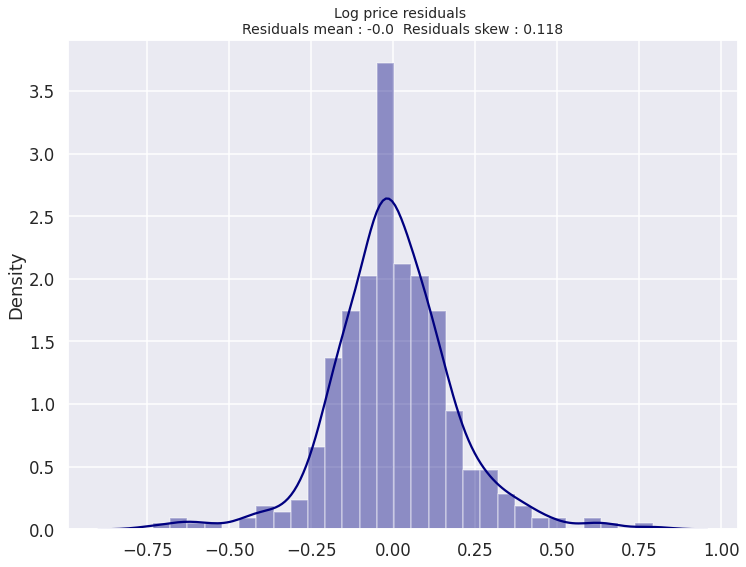

In [75]:
#Model No: 1
# Modified model transformed using log price and dropped two features

price = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

#residuals = y_train - results.fittedvalues
#residuals

#results.resid

# Graph of Actual vs Predicted
corr = round(y_train.corr(results.fittedvalues),2)
corr

# for log prices

plt.figure(figsize=(15,7))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual house price $ y _i$", fontsize=14)
plt.ylabel("Predicted house price $ \hat y _i$",  fontsize=14)
plt.title(f"Actul vs Predicted house prices (Corr = {corr})",  fontsize=14)
plt.show()

# without log price

plt.figure(figsize=(15,7))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='red')
plt.xlabel("Actual house price $ y _i$", fontsize=14)
plt.ylabel("Predicted house price $ \hat y _i$",  fontsize=14)
plt.title(f"Actul vs Predicted house prices (Corr = {corr})",  fontsize=14)
plt.show()


# Residuals vs Predicted values

plt.figure(figsize=(15,7))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel("Predicted log prices", fontsize=14)
plt.ylabel("Residuls",  fontsize=14)
plt.title("Residuls vs Predicted Values",  fontsize=14)
plt.show()


# Distribution of Residuals (log price) # checking for normality

resid_mean = round(results.resid.mean(),3)

resid_skew = round(results.resid.skew(),3)
print(f"Residuals mean : {resid_mean}  \nResiduals skew : {resid_skew}")

plt.figure(figsize=(12,9))
sns.distplot(results.resid, color='navy')
plt.title(f"Log price residuals \nResiduals mean : {resid_mean}  Residuals skew : {resid_skew}", fontsize=14)
plt.show()

# Above graph shows that there are more values to both extreme comparing to normal distribution

# Mean Squared Error & R squared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

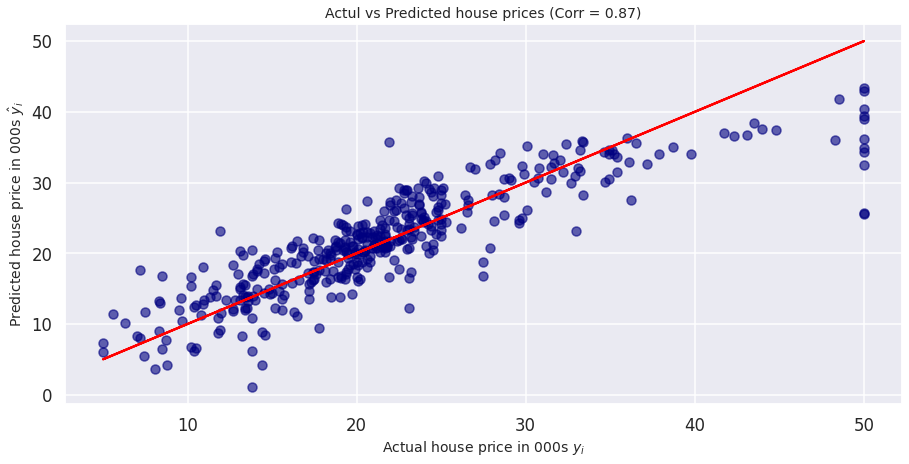

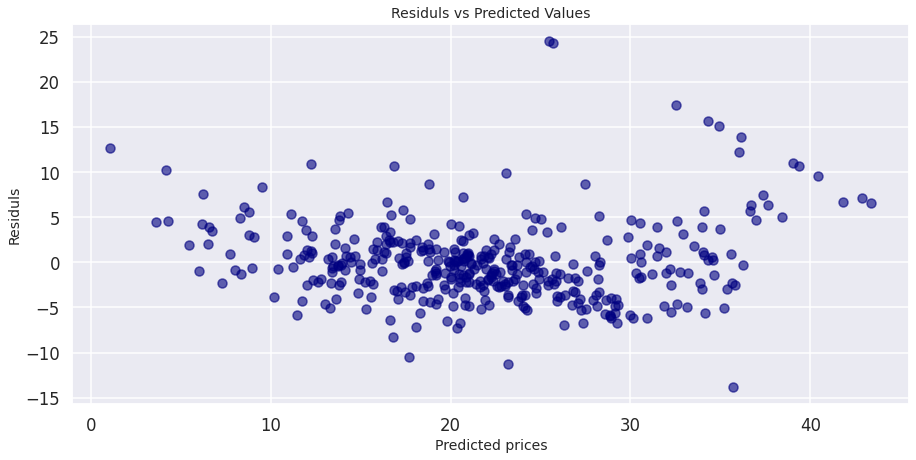

Residuals mean : -0.0  
Residuals skew : 1.459


/home/cn7/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


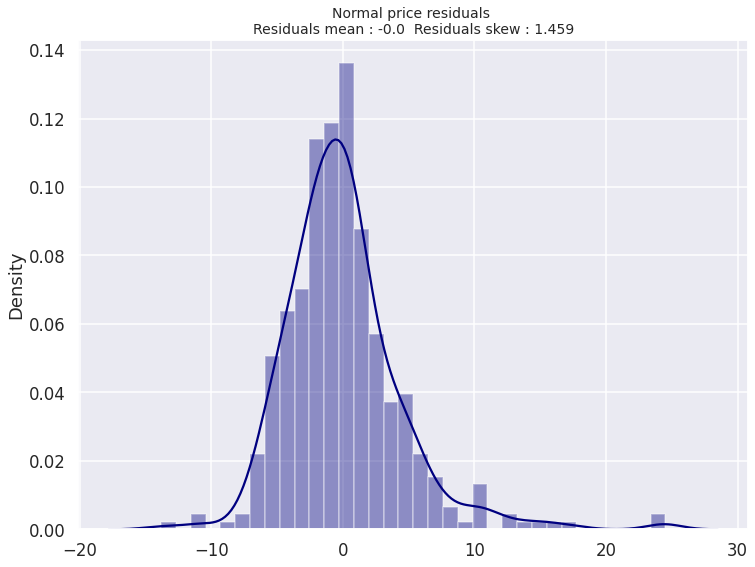

In [76]:
#Model No: 2
# Original model using normal prices and with all features

price = data['PRICE']
features = data.drop(['PRICE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

#residuals = y_train - results.fittedvalues
#residuals

#results.resid

# Graph of Actual vs Predicted
corr = round(y_train.corr(results.fittedvalues),2)
corr

plt.figure(figsize=(15,7))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual house price in 000s $ y _i$", fontsize=14)
plt.ylabel("Predicted house price in 000s $ \hat y _i$",  fontsize=14)
plt.title(f"Actul vs Predicted house prices (Corr = {corr})",  fontsize=14)
plt.show()


# Residuals vs Predicted values

plt.figure(figsize=(15,7))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel("Predicted prices", fontsize=14)
plt.ylabel("Residuls",  fontsize=14)
plt.title("Residuls vs Predicted Values",  fontsize=14)
plt.show()


# Distribution of Residuals (log price) # checking for normality

resid_mean = round(results.resid.mean(),3)

resid_skew = round(results.resid.skew(),3)
print(f"Residuals mean : {resid_mean}  \nResiduals skew : {resid_skew}")

plt.figure(figsize=(12,9))
sns.distplot(results.resid, color='navy')
plt.title(f"Normal price residuals \nResiduals mean : {resid_mean}  Residuals skew : {resid_skew}", fontsize=14)
plt.show()

# Above graph shows that there are more values to both extreme comparing to normal distribution

# Mean Squared Error & R squared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

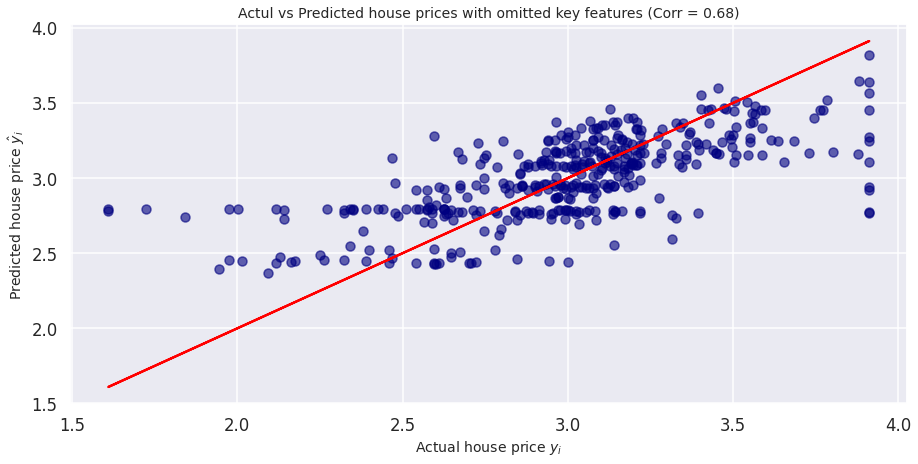

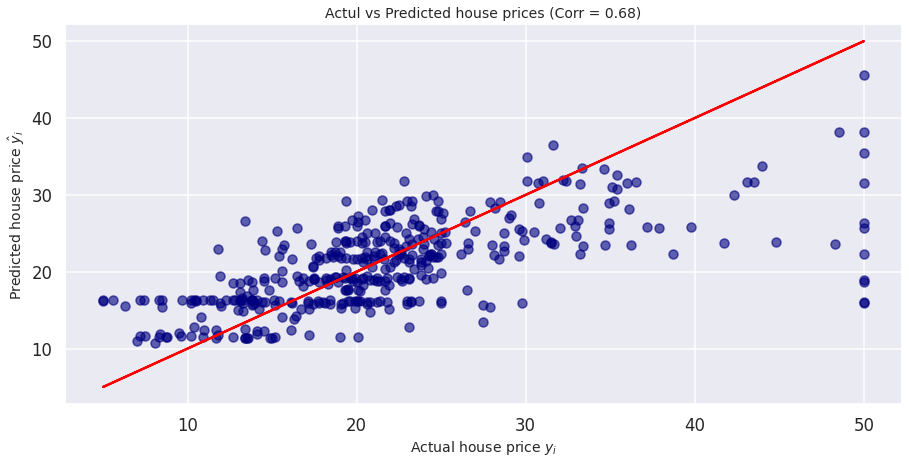

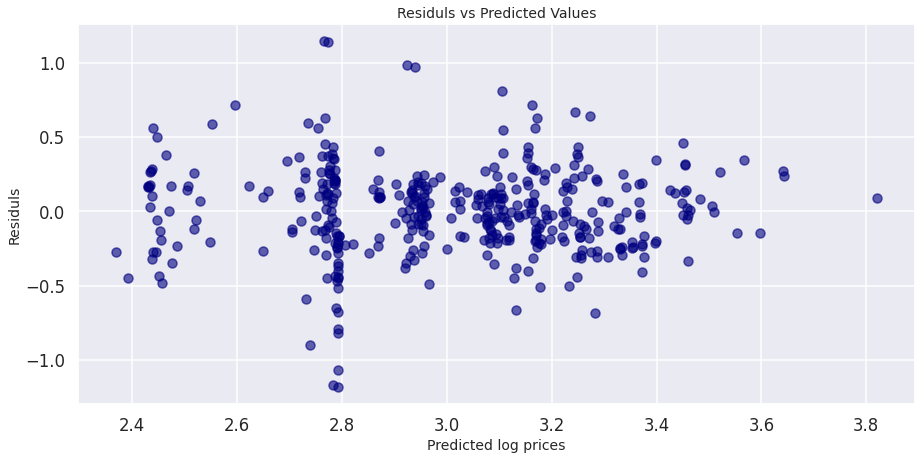

In [77]:
#Model No: 3
# Model Omitting key features using log price

price = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=10)

X_incl_constant = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_constant)
results = model.fit()

#residuals = y_train - results.fittedvalues
#residuals

#results.resid

# Graph of Actual vs Predicted
corr = round(y_train.corr(results.fittedvalues),2)
corr

# for log prices

plt.figure(figsize=(15,7))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual house price $ y _i$", fontsize=14)
plt.ylabel("Predicted house price $ \hat y _i$",  fontsize=14)
plt.title(f"Actul vs Predicted house prices with omitted key features (Corr = {corr})",  fontsize=14)
plt.show()

# without log price

plt.figure(figsize=(15,7))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='red')
plt.xlabel("Actual house price $ y _i$", fontsize=14)
plt.ylabel("Predicted house price $ \hat y _i$",  fontsize=14)
plt.title(f"Actul vs Predicted house prices (Corr = {corr})",  fontsize=14)
plt.show()


# Residuals vs Predicted values

plt.figure(figsize=(15,7))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel("Predicted log prices", fontsize=14)
plt.ylabel("Residuls",  fontsize=14)
plt.title("Residuls vs Predicted Values",  fontsize=14)
plt.show()

# Mean Squared Error & R squared
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)

In [78]:
# We can see banding of datapoints from above graph which tells we are missing some important features 
#(because we have dropped key features)

In [80]:
# Comparring all mse and rsquarred

pd.DataFrame({"Rsquared": [reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared],
              "MSE": [reduced_log_mse,full_normal_mse,omitted_var_mse],
              "RMSE": np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
             index=['Reduced Log model',"Full normal model","Omitted var model"])

# R-squared is relative measure with value always between 0 - 1 and does not contain any units
# MSE is absolute measure and has units same as target value (for log models units are in log and normal model units are in 000s)


,Rsquared,MSE,RMSE
Reduced Log model,0.792,0.035,0.187083
Full normal model,0.750,19.921,4.463295
Omitted var model,0.460,0.090,0.300000


In [81]:
# Best way to do prediction is to give the estimated value and the range
# By the normal distribution the range is set to +2s.d and -2s.d in normal distribution i.e +2RMSE and -2RSME

In [88]:
# Eg Calculate for 30000$ for reduced log

print("For 30000$ ")
print("1 s.d in log price :", np.sqrt(reduced_log_mse))
print("2 s.d in log price :", 2 * np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2 * np.sqrt(reduced_log_mse)
lower_bound = np.log(30) - 2 * np.sqrt(reduced_log_mse)
print("\nThe upper bound in log price for 95% of interval is :",upper_bound)
print("The lower bound in log price for 95% of interval is :",lower_bound)


print("\nThe upper bound in $ price for 95% of interval is :",np.e**upper_bound*1000)
print("The lower bound in $ price for 95% of interval is :",np.e**lower_bound*1000)

For 30000$ 
1 s.d in log price : 0.18708286933869708
2 s.d in log price : 0.37416573867739417

The upper bound in log price for 95% of interval is : 3.7753631203395495
The lower bound in log price for 95% of interval is : 3.0270316429847615

The upper bound in $ price for 95% of interval is : 43613.34233239937
The lower bound in $ price for 95% of interval is : 20635.886906824155
